# Loi des coefficients de la régression linéaire

Le but de cet exemple est de montrer comment calculer la loi des coefficients de la régression linéaire par moindres carrés. On fait l'hypothèse que les résidus suivent la loi gaussienne. Nous calculons les paramètres de la loi gaussienne des paramètres, c'est à dire la moyenne et la matrice de covariance. 

**Hypothèses** _(Hypothèses du modèle de regression linéaire)_
On considère le modèle :
$$
\boldsymbol{Y} = X \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$
où $\boldsymbol{Y}$ est le vecteur aléatoire de dimension $n$ représentant les observations, $X$ 
est la matrice de conception de taille $n\times p$, $\boldsymbol{\beta}$ est le vecteur de 
dimension $p$ représentant les paramètres et $\boldsymbol{\epsilon}$ est un vecteur aléatoire 
de dimension $n$. 

La définition suivante introduit le problème des moindres carrés linéaires. 

**Définition** _(Moindres carrés linéaires)_
Soit $\boldsymbol{Y}$ une réalisation du vecteur aléatoire $\boldsymbol{Y}$. 
La méthode des moindres carrés non linéaires consiste à rechercher 
$\hat{\boldsymbol{\beta}}$ tel que : 
$$
\hat{\boldsymbol{\beta}}
\in \textrm{argmin}_{\boldsymbol{\beta}\in\mathbb{R}^p} \frac{1}{2} \| \boldsymbol{Y} - X \boldsymbol{\beta} \|_2^2.
$$

Le théorème suivant présente la solution du problème des moindres carrés linéaires. 

**Théorème** _(Solution des équations normales)_
L'estimateur des moindres carrés $\hat{\boldsymbol{\beta}}$ est solution des équations 
normales :
$$
X^T X \hat{\boldsymbol{\beta}} = X^T \boldsymbol{Y}.
$$
Si $X$ est de rang plein, alors :
$$
\hat{\boldsymbol{\beta}} = \left(X^T X\right)^{-1} X^T \boldsymbol{Y}.
$$
Dans ce cas, le vecteur des prédictions est :
$$
\hat{\boldsymbol{Y}} = X \hat{\boldsymbol{\beta}}.
$$

La démonstration est fondée sur le fait que, si $X$ est de rang plein, 
alors la matrice $X^T X$ est inversible. 

Nous nous intéressons aux prédictions du modèle de régression. 
Nous avons vu comment évaluer le vecteur des prédictions $\hat{\boldsymbol{Y}}$ en fonction 
du vecteur de l'estimateur des paramètres $\hat{\boldsymbol{\beta}}$. 
Le théorème suivant présente une expression du vecteur des prédictions $\hat{\boldsymbol{Y}}$ 
en fonction du vecteur des observations $\boldsymbol{Y}$. 

**Théorème** _(Prédictions)_
Le vecteur des prédictions du modèle de régression linéaires est :
$$
\hat{\boldsymbol{Y}} = P \boldsymbol{Y}
$$
où $P$ est la matrice de projection, de taille $n\times n$ :
$$
P = X \left(X^T X\right)^{-1} X^T.
$$

Dans le but d'estimer l'erreur de prédiction, nous introduisons le vecteur 
des différences entre les prédictions et les observations. 

**Définition** _(Résidus)_
Le vecteur des résidus est :
$$
\boldsymbol{r} = \boldsymbol{Y} - \hat{\boldsymbol{Y}}.
$$

Par conséquent,
$$
\boldsymbol{r} = (I - P) \boldsymbol{Y}
$$
où $I$ est la matrice identité.

Pour obtenir les résultats qui vont suivrent, nous aurons besoin 
de l'hypothèse suivante sur le vecteur des résidus.

**Hypothèses** _(Espérance et covariance du résidu)_
On fait l'hypothèse que 
$$
\mathbb{E}\left(\boldsymbol{\epsilon}\right) = \boldsymbol{0}
$$
et
$$
\boldsymbol{Cov}(\boldsymbol{\epsilon}) = \sigma^2 I,
$$
où $\sigma > 0$ est un réel.

Les hypothèses précédentes spécifie l'espérance et la covariance du vecteur 
des résidus. 
Ces hypothèses ne sont pas nécessairement associées à une distribution gaussienne. 
Toutefois, comme nous allons le voir dans la section suivante, beaucoup plus 
d'informations peuvent être obtenues si la loi des résidus est gaussienne. 

Nous présentons les principales propriétés du modèle 
de régression linéaire. 
En particulier, nous présentons la loi du vecteur des paramètres et la 
loi du vecteur des résidus. 

Le théorème suivant présente l'espérance et la covariance de la prédiction du 
modèle de régression linéaire. 

**Théorème** _(Espérance et covariance du modèle de régression)_
L'espérance de $\boldsymbol{Y}$ est 
$$
\mathbb{E}(\boldsymbol{Y}) = X \boldsymbol{\beta}
$$
et sa covariance est :
$$
\boldsymbol{Cov}(\boldsymbol{Y}) = \sigma^2 I.
$$

Si, de plus, $\boldsymbol{\epsilon} \sim \mathcal{N}\left(\boldsymbol{0}, \sigma^2 I\right)$, alors :
$$
\boldsymbol{Y} \sim \mathcal{N}\left(X\boldsymbol{\beta}, \sigma^2 I\right).
$$

Le théorème suivant présente l'espérance et la covariance du vecteur 
des paramètres. 

**Théorème** _(Espérance et covariance du vecteur des paramètres)_
L'espérance de $\hat{\boldsymbol{\beta}}$ est :
$$
\mathbb{E}\left(\hat{\boldsymbol{\beta}}\right) = \boldsymbol{\beta}
$$
et sa covariance est :
$$
\boldsymbol{Cov}\left(\hat{\boldsymbol{\beta}}\right) = \left(X^T X\right)^{-1} \sigma^2.
$$

Si, de plus, $\boldsymbol{\epsilon} \sim \mathcal{N}(\boldsymbol{0}, \sigma^2 I)$, alors :
$$
\hat{\boldsymbol{\beta}} \sim \mathcal{N}\left(\boldsymbol{\beta}, \left(X^T X\right)^{-1} \sigma^2\right).
$$

## Références
- Nicholas H Bingham and John M Fry. Regression : Linear models in statistics. Springer Science & Business Media, 2010.

## Create a least squares problem

In [1]:
import openturns as ot
import openturns.viewer as otv
from math import sqrt
import pylab as pl

In [2]:
g_function = ot.SymbolicFunction(["x1", "x2", "x3"], ["1.0 + 2.0 * x1 - 3.0 * x2 + 4.0 * x3"])

In [3]:
dist_x1 = ot.Normal(0.0, 1.0)
dist_x2 = ot.Normal(0.0, 1.0)
dist_x3 = ot.Normal(0.0, 1.0)
distribution = ot.ComposedDistribution([dist_x1, dist_x2, dist_x3])
print(distribution)

ComposedDistribution(Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), Normal(mu = 0, sigma = 1), IndependentCopula(dimension = 3))


In [4]:
sample_size = 10
input_sample = distribution.getSample(sample_size)
output_sample = g_function(input_sample)
output_sample[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=1 description=[y0] data=[[4.91968],[-0.532259],[2.84135],[3.83276],[2.46704]]

In [5]:
dist_epsilon = ot.Normal(0.0, 1.0)
epsilon_sample = dist_epsilon.getSample(sample_size)
observation_sample = output_sample + epsilon_sample
observation_sample[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=1 description=[y0] data=[[4.19815],[-0.773482],[1.05338],[4.23412],[3.83487]]

## Solve the least squares problem

In [6]:
myLeastSquares = ot.LinearLeastSquares(input_sample, observation_sample)
myLeastSquares.run()
responseSurface = myLeastSquares.getMetaModel()
responseSurface

class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x1,x2,y0] evaluationImplementation=class=LinearEvaluation name=Unnamed center=class=Point name=Unnamed dimension=3 values=[0,0,0] constant=class=Point name=Unnamed dimension=1 values=[1.33725] linear=class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=3 columns=1 values=[1.8452,-2.61505,4.07332] gradientImplementation=class=ConstantGradient name=Unnamed constant=class=Matrix implementation=class=MatrixImplementation name=Unnamed rows=3 columns=1 values=[1.8452,-2.61505,4.07332] hessianImplementation=class=ConstantHessian name=Unnamed constant=class=SymmetricTensor implementation=class=TensorImplementation name=Unnamed rows=3 columns=3 sheets=1 values=[0,0,0,0,0,0,0,0,0]

In [7]:
predicted_outputs = responseSurface(input_sample)
residuals_sample = observation_sample - predicted_outputs
residuals_sample.setDescription(["Residuals"])
residuals_sample[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=1 description=[Residuals] data=[[-0.807179],[-0.907638],[-1.23538],[0.807378],[1.16315]]

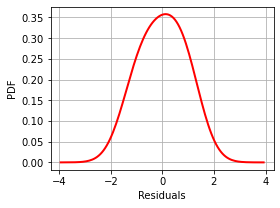

In [8]:
graph = ot.KernelSmoothing().build(residuals_sample).drawPDF()
graph.setLegends([""])
view = otv.View(graph, figure_kw={"figsize": (4.0, 3.0)})

## Compute the distribution of the coefficients